# **Object Recognition Using MLP Classifier**

### **1. Importing Libraries and Dataset**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.datasets import cifar10

### **2. Data Preprocessing and Model Initialization**

In [19]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

# Flatten and normalize image data
x_train_flat = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255.0
x_test_flat = x_test.reshape(x_test.shape[0], -1).astype('float32') / 255.0

# Initialize MLP model with hyperparameter tuning
mlp = MLPClassifier(hidden_layer_sizes=(128, 64),  # Two hidden layers: 128 and 64 neurons
                    activation='relu',             # ReLU activation
                    solver='adam',                 # Adam optimizer
                    max_iter=100,                  # Increase iterations for convergence
                    learning_rate_init=0.001,      # Learning rate adjustment
                    random_state=42,               # Ensure reproducibility
                    verbose=True)

# Fit the model
mlp.fit(x_train_flat, y_train)

# Predict on the test set
y_pred = mlp.predict(x_test_flat)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Iteration 1, loss = 1.92767060
Iteration 2, loss = 1.74265599
Iteration 3, loss = 1.65574098
Iteration 4, loss = 1.61486745
Iteration 5, loss = 1.57404423
Iteration 6, loss = 1.54571629
Iteration 7, loss = 1.51558185
Iteration 8, loss = 1.49506283
Iteration 9, loss = 1.47535706
Iteration 10, loss = 1.46626627
Iteration 11, loss = 1.45158219
Iteration 12, loss = 1.42560220
Iteration 13, loss = 1.42059517
Iteration 14, loss = 1.40965044
Iteration 15, loss = 1.39657831
Iteration 16, loss = 1.38811111
Iteration 17, loss = 1.37547731
Iteration 18, loss = 1.37481177
Iteration 19, loss = 1.36675704
Iteration 20, loss = 1.35128021
Iteration 21, loss = 1.34280443
Iteration 22, loss = 1.33537674
Iteration 23, loss = 1.32436752
Iteration 24, loss = 1.33209670
Iteration 25, loss = 1.31522119
Iteration 26, loss = 1.30339479
Iteration 27, loss = 1.29851139
Iteration 28, loss = 1.30149925
Iteration 29, loss = 1.28559625
Iteration 30, loss = 1.28631651
Iteration 31, loss = 1.27742684
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


### **3. Model Prediction**

In [20]:
# Predict on the test set
y_pred = mlp.predict(x_test_flat)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.4897


### **7. Detailed Classification Report**

In [21]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.56      0.57      1000
           1       0.64      0.55      0.59      1000
           2       0.36      0.36      0.36      1000
           3       0.34      0.32      0.33      1000
           4       0.41      0.41      0.41      1000
           5       0.44      0.33      0.38      1000
           6       0.51      0.56      0.54      1000
           7       0.45      0.67      0.54      1000
           8       0.67      0.55      0.61      1000
           9       0.54      0.58      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.49      0.49     10000



### **4. Visualizing Predictions vs. Actual Labels**

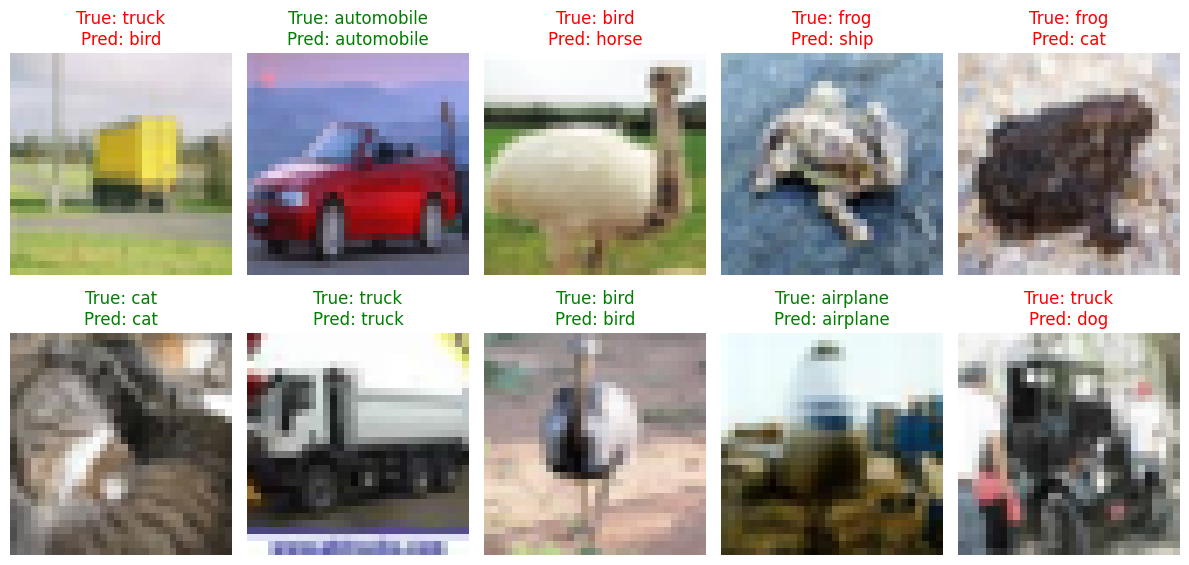

In [23]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

import random

plt.figure(figsize=(12, 6))
for i in range(10):
    index = random.randint(0, len(x_test) - 1)
    img = x_test[index]
    true_label = y_test[index]
    predicted_label = y_pred[index]

    color = 'green' if predicted_label == true_label else 'red'

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[predicted_label]}",
              color=color)

plt.tight_layout()
plt.show()


### **5. Confusion Matrix**

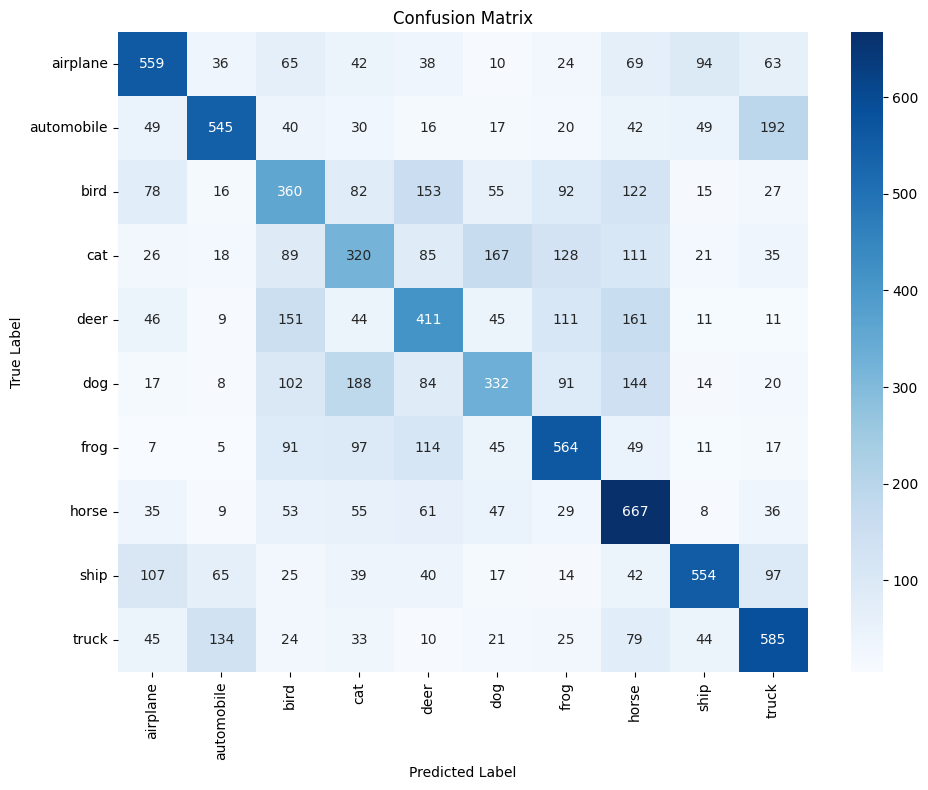

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


### **6. Class-wise Accuracy (Recall) Plot**

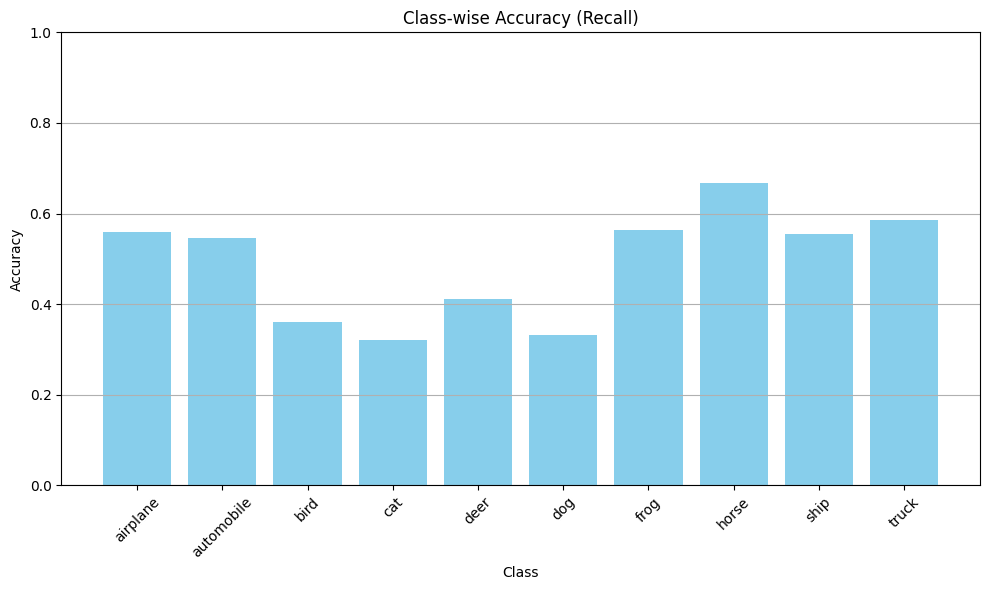

In [25]:
from sklearn.metrics import classification_report

# Get precision, recall, f1-score per class
report = classification_report(y_test, y_pred, output_dict=True)

# Extract accuracies per class
accuracies = [report[str(i)]['recall'] for i in range(10)]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_names, accuracies, color='skyblue')
plt.ylim(0, 1)
plt.title("Class-wise Accuracy (Recall)")
plt.ylabel("Accuracy")
plt.xlabel("Class")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### **7. Training accuracy vs validation accuracy Curve**

Iteration 1, loss = 1.99886167
Iteration 2, loss = 1.80643880
Iteration 3, loss = 1.72813272
Iteration 4, loss = 1.67900729
Iteration 5, loss = 1.64456892
Iteration 6, loss = 1.61363101
Iteration 7, loss = 1.59373844
Iteration 8, loss = 1.57488000
Iteration 9, loss = 1.53983295
Iteration 10, loss = 1.52126300
Iteration 11, loss = 1.50413501
Iteration 12, loss = 1.48680520
Iteration 13, loss = 1.47343647
Iteration 14, loss = 1.46017778
Iteration 15, loss = 1.45917618
Iteration 16, loss = 1.43930566
Iteration 17, loss = 1.42225683
Iteration 18, loss = 1.41364121
Iteration 19, loss = 1.40174305
Iteration 20, loss = 1.39215255
Iteration 21, loss = 1.39034641
Iteration 22, loss = 1.37892675
Iteration 23, loss = 1.38259435
Iteration 24, loss = 1.35945261
Iteration 25, loss = 1.35820913
Iteration 26, loss = 1.36178625
Iteration 27, loss = 1.34299135
Iteration 28, loss = 1.33746099
Iteration 29, loss = 1.33517087
Iteration 30, loss = 1.32155430
Iteration 31, loss = 1.31115019
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.99907613
Iteration 2, loss = 1.80894411
Iteration 3, loss = 1.72017324
Iteration 4, loss = 1.65676558
Iteration 5, loss = 1.63055897
Iteration 6, loss = 1.58858216
Iteration 7, loss = 1.56536043
Iteration 8, loss = 1.54704261
Iteration 9, loss = 1.51853919
Iteration 10, loss = 1.49378622
Iteration 11, loss = 1.48325014
Iteration 12, loss = 1.46309805
Iteration 13, loss = 1.46449816
Iteration 14, loss = 1.43793845
Iteration 15, loss = 1.42764914
Iteration 16, loss = 1.41421592
Iteration 17, loss = 1.40787661
Iteration 18, loss = 1.40023673
Iteration 19, loss = 1.39193201
Iteration 20, loss = 1.38664138
Iteration 21, loss = 1.36602294
Iteration 22, loss = 1.37168813
Iteration 23, loss = 1.35064256
Iteration 24, loss = 1.34749568
Iteration 25, loss = 1.34402573
Iteration 26, loss = 1.33735490
Iteration 27, loss = 1.32766986
Iteration 28, loss = 1.32305205
Iteration 29, loss = 1.32267892
Iteration 30, loss = 1.32799423
Iteration 31, loss = 1.30346870
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.98774552
Iteration 2, loss = 1.80455375
Iteration 3, loss = 1.72684216
Iteration 4, loss = 1.66401887
Iteration 5, loss = 1.62224221
Iteration 6, loss = 1.58551729
Iteration 7, loss = 1.57084107
Iteration 8, loss = 1.53968334
Iteration 9, loss = 1.51462674
Iteration 10, loss = 1.49193275
Iteration 11, loss = 1.48247361
Iteration 12, loss = 1.46227396
Iteration 13, loss = 1.46138418
Iteration 14, loss = 1.44542837
Iteration 15, loss = 1.43226099
Iteration 16, loss = 1.41751003
Iteration 17, loss = 1.41579962
Iteration 18, loss = 1.39919329
Iteration 19, loss = 1.39293075
Iteration 20, loss = 1.38527215
Iteration 21, loss = 1.38135052
Iteration 22, loss = 1.36348712
Iteration 23, loss = 1.35557795
Iteration 24, loss = 1.37205648
Iteration 25, loss = 1.34326231
Iteration 26, loss = 1.33216035
Iteration 27, loss = 1.32287431
Iteration 28, loss = 1.32692134
Iteration 29, loss = 1.31255245
Iteration 30, loss = 1.31382513
Iteration 31, loss = 1.31880534
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


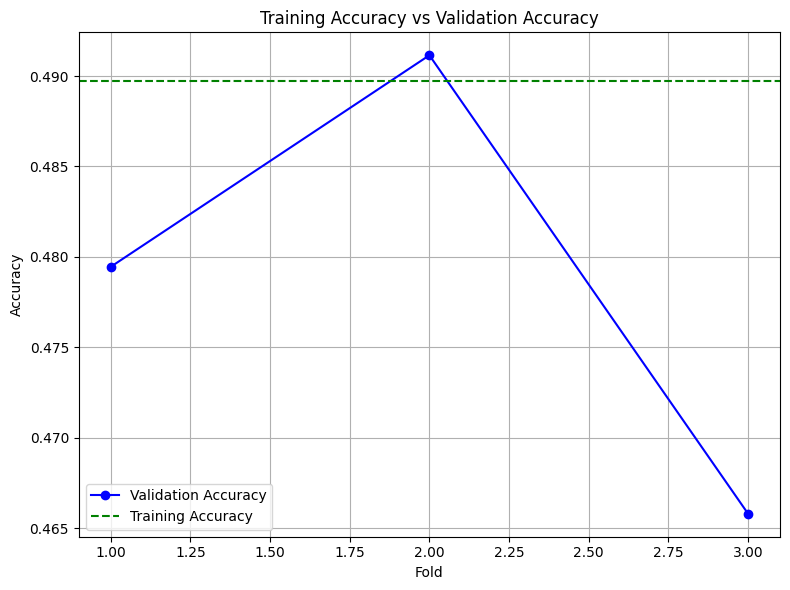

In [26]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(mlp, x_train_flat, y_train, cv=3, scoring='accuracy')

# Plot training accuracy vs validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', color='blue', label='Validation Accuracy')

plt.axhline(y=accuracy, color='green', linestyle='--', label='Training Accuracy')

plt.title("Training Accuracy vs Validation Accuracy")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
